# Predict the Japan Used cars price 

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset

car_df = pd.read_csv('Japan_used_cars_datasets.csv')
car_df

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline
...,...,...,...,...,...,...,...,...,...,...,...
2313,2331,1400,toyota,vitz,2009,121000,996,at,2wd,rhd,gasoline
2314,2332,1400,toyota,estima,2003,101000,3000,at,2wd,rhd,gasoline
2315,2333,1400,subaru,r2,2005,101000,660,cvt,2wd,rhd,gasoline
2316,2334,1400,honda,z,2000,170000,660,at,4wd,rhd,gasoline


# EDA

In [3]:
car_df.shape

(2318, 11)

In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2318 non-null   int64 
 1   price            2318 non-null   int64 
 2   mark             2318 non-null   object
 3   model            2318 non-null   object
 4   year             2318 non-null   int64 
 5   mileage          2318 non-null   int64 
 6   engine_capacity  2318 non-null   int64 
 7   transmission     2318 non-null   object
 8   drive            2318 non-null   object
 9   hand_drive       2318 non-null   object
 10  fuel             2318 non-null   object
dtypes: int64(5), object(6)
memory usage: 199.3+ KB


There are no null values in any column

In [5]:
car_df.columns

Index(['id', 'price', 'mark', 'model', 'year', 'mileage', 'engine_capacity',
       'transmission', 'drive', 'hand_drive', 'fuel'],
      dtype='object')

In [6]:
car_df.dtypes

id                  int64
price               int64
mark               object
model              object
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

All columns have (or belong to) correct data type

In [7]:
car_df.describe()

,id,price,year,mileage,engine_capacity
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,1169.047023,971.522433,2005.972390,100013.194996,1507.010785
std,674.460724,288.673112,3.698863,52512.478883,549.585170
min,0.000000,80.000000,1979.000000,2000.000000,9.000000
25%,583.250000,776.000000,2004.000000,67000.000000,1300.000000
50%,1168.500000,1000.000000,2006.000000,94000.000000,1490.000000
75%,1753.750000,1213.000000,2009.000000,124000.000000,1800.000000
max,2335.000000,1400.000000,2015.000000,790000.000000,12340.000000


In [8]:
car_df.describe(include='all')

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2318.000000,2318.000000,2318,2318,2318.000000,2318.000000,2318.000000,2318,2318,2318,2318
unique,NaN,NaN,28,258,NaN,NaN,NaN,3,3,3,5
top,NaN,NaN,toyota,fit,NaN,NaN,NaN,at,2wd,rhd,gasoline
freq,NaN,NaN,1047,270,NaN,NaN,NaN,2171,2121,2301,2290
mean,1169.047023,971.522433,NaN,NaN,2005.972390,100013.194996,1507.010785,NaN,NaN,NaN,NaN
std,674.460724,288.673112,NaN,NaN,3.698863,52512.478883,549.585170,NaN,NaN,NaN,NaN
min,0.000000,80.000000,NaN,NaN,1979.000000,2000.000000,9.000000,NaN,NaN,NaN,NaN
25%,583.250000,776.000000,NaN,NaN,2004.000000,67000.000000,1300.000000,NaN,NaN,NaN,NaN
50%,1168.500000,1000.000000,NaN,NaN,2006.000000,94000.000000,1490.000000,NaN,NaN,NaN,NaN
75%,1753.750000,1213.000000,NaN,NaN,2009.000000,124000.000000,1800.000000,NaN,NaN,NaN,NaN


In [9]:
car_df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [10]:
car_df['transmission'].unique()

array(['at', 'mt', 'cvt'], dtype=object)

The column or feature or variable 'transmission' is an object data type which has 3 unique values, 'at','mt','cvt'. So, it is categorical data

In [11]:
car_df['drive'].unique()

array(['2wd', '4wd', 'awd'], dtype=object)

The 'drive' column or feature or variable is an object data type which has 3 unique values, '2wd','4wd','awd'. So, it is categorical data

In [12]:
car_df['hand_drive'].unique()

array(['rhd', 'center', 'lhd'], dtype=object)

'hand_drive' is also a categorical data with 3 unique values 'rhd','center','lhd'

In [13]:
car_df['fuel'].unique()

array(['gasoline', 'diesel', 'hybrid', 'lpg', 'cng'], dtype=object)

The feature 'fuel' has 5 unique values,'gasoline','diesel','hybrid','lpg','cng'

In [14]:
car_df['mark'].unique()

array(['nissan', 'toyota', 'daihatsu', 'volkswagen', 'mazda', 'honda',
       'subaru', 'mercedes-benz', 'kubota', 'mitsubishi', 'suzuki', 'bmw',
       'chrysler', 'smart', 'gm', 'opel', 'isuzu', 'land rover',
       'peugeot', 'hyundai', 'kia motors', 'audi', 'citroen', 'mitsuoka',
       'volvo', 'ford', 'hino', 'jaguar'], dtype=object)

In [15]:
car_df['mark'].nunique()

28

In [16]:
car_df['model'].nunique()

258

In [17]:
# Checking for Null values

car_df.isnull().sum()

id                 0
price              0
mark               0
model              0
year               0
mileage            0
engine_capacity    0
transmission       0
drive              0
hand_drive         0
fuel               0
dtype: int64

# Data Visualization

For categorical data , we can use countplot that gives the frequency of the classes of the columns

gasoline    2290
diesel        18
lpg            7
hybrid         2
cng            1
Name: fuel, dtype: int64


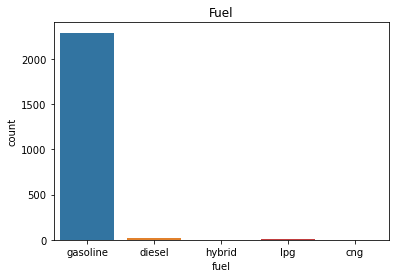

In [18]:
# countplot for fuel

ax = sns.countplot(x='fuel', data=car_df)
print(car_df['fuel'].value_counts())
plt.title("Fuel")
plt.show()

We can observe that more cars are gasoline cars

at     2171
mt      117
cvt      30
Name: transmission, dtype: int64


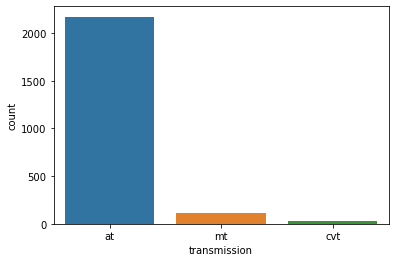

In [19]:
# countplot for transmission

ax = sns.countplot(x='transmission', data=car_df)
print(car_df['transmission'].value_counts())

We can observe that more cars use 'at' transmission

2wd    2121
4wd     192
awd       5
Name: drive, dtype: int64


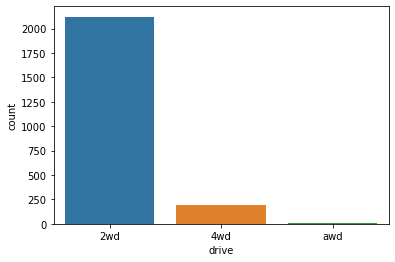

In [20]:
# countplot for drive

ax = sns.countplot(x='drive', data=car_df)
print(car_df['drive'].value_counts())

rhd       2301
lhd         16
center       1
Name: hand_drive, dtype: int64


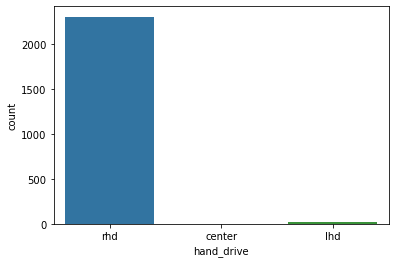

In [21]:
# countplot for hand_drive

ax = sns.countplot(x='hand_drive', data=car_df)
print(car_df['hand_drive'].value_counts())

In [22]:
car_df.head()

,id,price,mark,model,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,0,80,nissan,march,2003,80000,1240,at,2wd,rhd,gasoline
1,1,110,nissan,march,2010,53000,1200,at,2wd,rhd,gasoline
2,2,165,nissan,lafesta,2005,47690,2000,at,2wd,rhd,gasoline
3,3,190,toyota,avensis,2008,130661,1990,at,2wd,rhd,gasoline
4,4,190,daihatsu,mira,2006,66300,660,at,2wd,rhd,gasoline


In [23]:
# dropping id, mark and model columns

car_df.drop(['id', 'mark','model'], axis=1,inplace=True)

In [24]:
car_df.dtypes

price               int64
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

<AxesSubplot:xlabel='transmission', ylabel='price'>

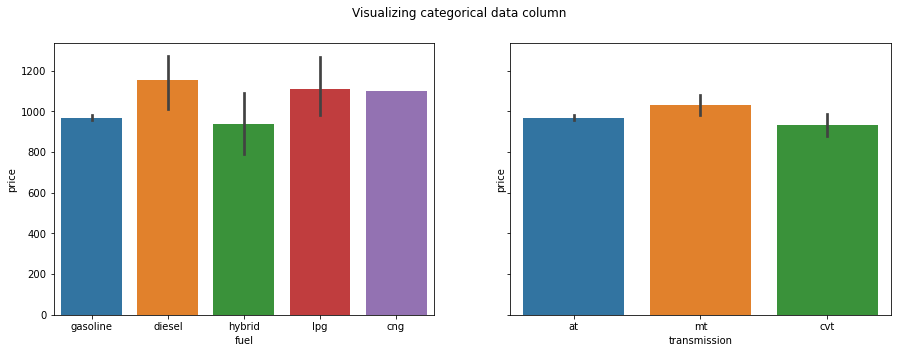

In [25]:
fuel_type = car_df['fuel']
trans = car_df['transmission']
price = car_df['price']


fig,axes = plt.subplots(1,2,figsize=(15,5),sharey=True)
fig.suptitle('Visualizing categorical data column')
sns.barplot(x=fuel_type,y=price,ax=axes[0])
sns.barplot(x=trans,y=price,ax=axes[1])



<AxesSubplot:xlabel='hand_drive', ylabel='price'>

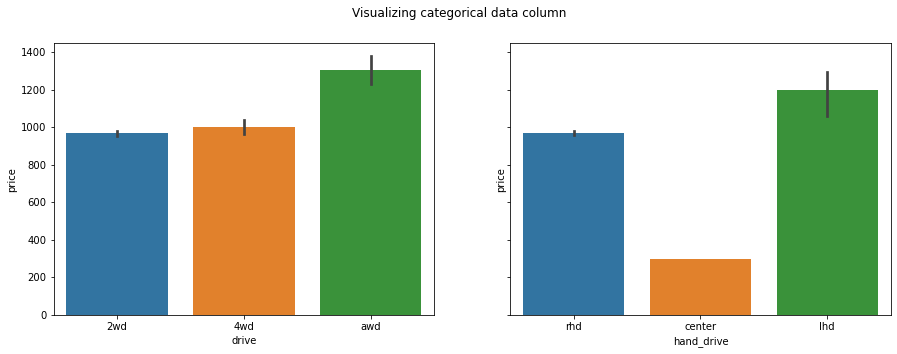

In [26]:
dr = car_df['drive']
hd = car_df['hand_drive']

fig,axes = plt.subplots(1,2,figsize=(15,5),sharey=True)
fig.suptitle('Visualizing categorical data column')
sns.barplot(x=dr,y=price,ax=axes[0])
sns.barplot(x=hd,y=price,ax=axes[1])

In [27]:
num_features = car_df.dtypes[car_df.dtypes != 'object'].index
num_features

Index(['price', 'year', 'mileage', 'engine_capacity'], dtype='object')

In [28]:
car_df[num_features]

,price,year,mileage,engine_capacity
0,80,2003,80000,1240
1,110,2010,53000,1200
2,165,2005,47690,2000
3,190,2008,130661,1990
4,190,2006,66300,660
...,...,...,...,...
2313,1400,2009,121000,996
2314,1400,2003,101000,3000
2315,1400,2005,101000,660
2316,1400,2000,170000,660


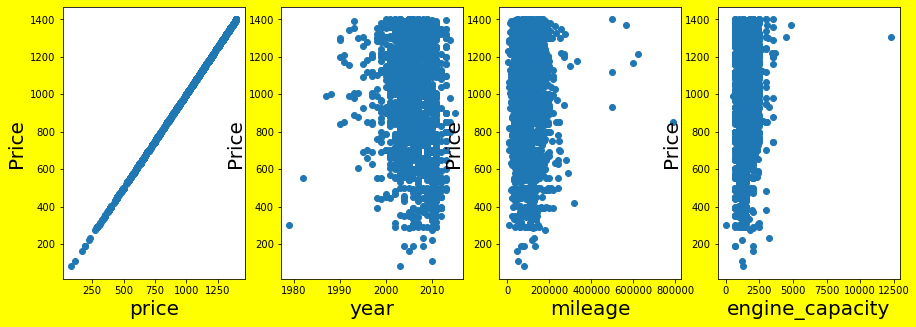

In [29]:
# Visualizing relationship

plt.figure(figsize=(15,5), facecolor='yellow')
plotnumber = 1

for column in car_df[num_features]:
    if plotnumber <=4:
        ax = plt.subplot(1,4,plotnumber)
        #sns.distplot(data[column])
        plt.scatter(car_df[column],price)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price', fontsize=20)
    plotnumber += 1
plt.show()

In [30]:
cat_features = car_df.dtypes[car_df.dtypes == 'object'].index
cat_features

Index(['transmission', 'drive', 'hand_drive', 'fuel'], dtype='object')

In [31]:
car_df.dtypes

price               int64
year                int64
mileage             int64
engine_capacity     int64
transmission       object
drive              object
hand_drive         object
fuel               object
dtype: object

In [32]:
car_df.shape

(2318, 8)

In [33]:
car_df.drop_duplicates(inplace=True)

In [34]:
car_df.shape

(2299, 8)

There were some dupliactes which are deleted, as the shape or number of rows before dropping duplicates were 2318 and after dropping duplicaetes the number of rows are 2299.

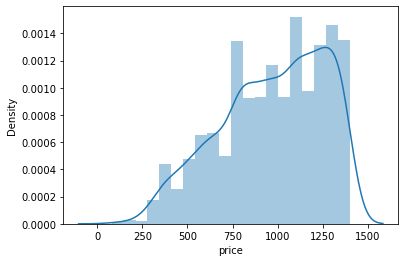

In [35]:
sns.distplot(car_df.price)
plt.show()

# Fixing categorical features

In [36]:
car_df.head()

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,2003,80000,1240,at,2wd,rhd,gasoline
1,110,2010,53000,1200,at,2wd,rhd,gasoline
2,165,2005,47690,2000,at,2wd,rhd,gasoline
3,190,2008,130661,1990,at,2wd,rhd,gasoline
4,190,2006,66300,660,at,2wd,rhd,gasoline


In [37]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

In [38]:
for i in car_df.columns:
    if car_df[i].dtypes == "object":
        car_df[i] = enc.fit_transform(car_df[i].values.reshape(-1,1))

In [39]:
car_df.sample(5)

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
1597,1166,2005,65421,2500,0.0,0.0,2.0,2.0
1475,1120,2006,105000,1000,0.0,0.0,2.0,2.0
370,650,2009,184100,1500,0.0,0.0,2.0,2.0
1609,1175,2007,332926,1997,0.0,0.0,1.0,1.0
409,670,2001,163691,1990,0.0,1.0,2.0,2.0


In [40]:
# only continous variable

car_df.describe()

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
count,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
mean,970.982601,2005.983036,99947.404524,1503.045237,0.113093,0.084385,1.992171,1.998260
std,289.162960,3.698984,52646.563452,546.525992,0.447698,0.282681,0.092962,0.150417
min,80.000000,1979.000000,2000.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,775.000000,2004.000000,67000.000000,1300.000000,0.000000,0.000000,2.000000,2.000000
50%,1000.000000,2006.000000,94000.000000,1490.000000,0.000000,0.000000,2.000000,2.000000
75%,1213.000000,2009.000000,124000.000000,1800.000000,0.000000,0.000000,2.000000,2.000000
max,1400.000000,2015.000000,790000.000000,12340.000000,2.000000,2.000000,2.000000,4.000000


# Correlation with target columns

In [41]:
car_df.corr()['price'].sort_values()

year              -0.210402
hand_drive        -0.036720
fuel              -0.016399
mileage            0.021808
transmission       0.040100
drive              0.042634
engine_capacity    0.175127
price              1.000000
Name: price, dtype: float64

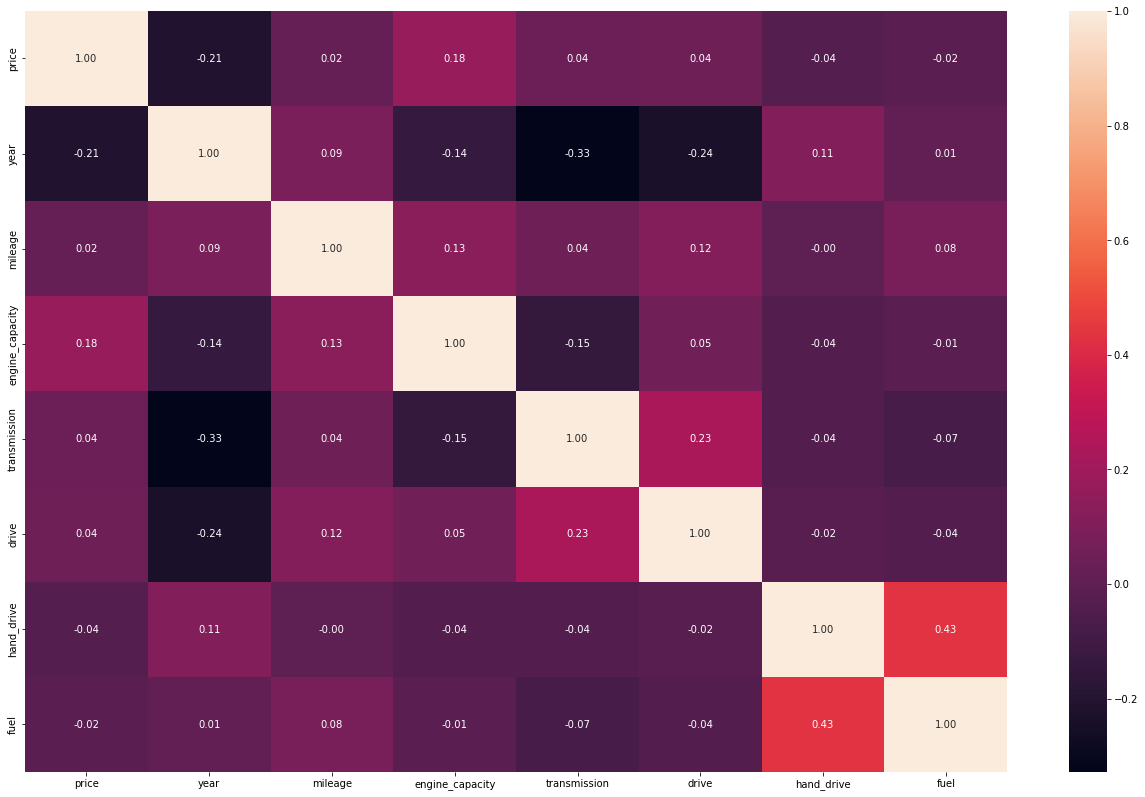

In [42]:
# heatmap

plt.figure(figsize=(22,14))
sns.heatmap(car_df.corr(),annot=True,fmt="0.2f")
plt.show()      

# Checking the columns which are positively and negative correltaed with the target columns

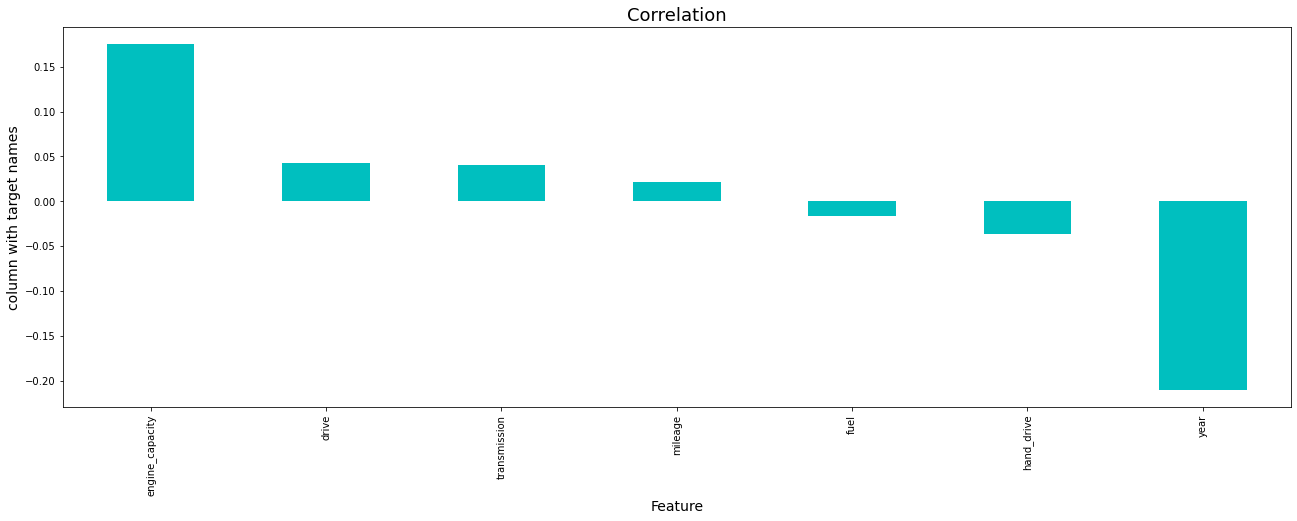

In [43]:
plt.figure(figsize=(22,7))
car_df.corr()['price'].sort_values(ascending=False).drop(['price']).plot(kind='bar',color='c')
plt.xlabel('Feature', fontsize=14)
plt.ylabel('column with target names', fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Very less correlation between target variable and features. So, no multi-collinearity problem

In [44]:
car_df.head()

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,2003,80000,1240,0.0,0.0,2.0,2.0
1,110,2010,53000,1200,0.0,0.0,2.0,2.0
2,165,2005,47690,2000,0.0,0.0,2.0,2.0
3,190,2008,130661,1990,0.0,0.0,2.0,2.0
4,190,2006,66300,660,0.0,0.0,2.0,2.0


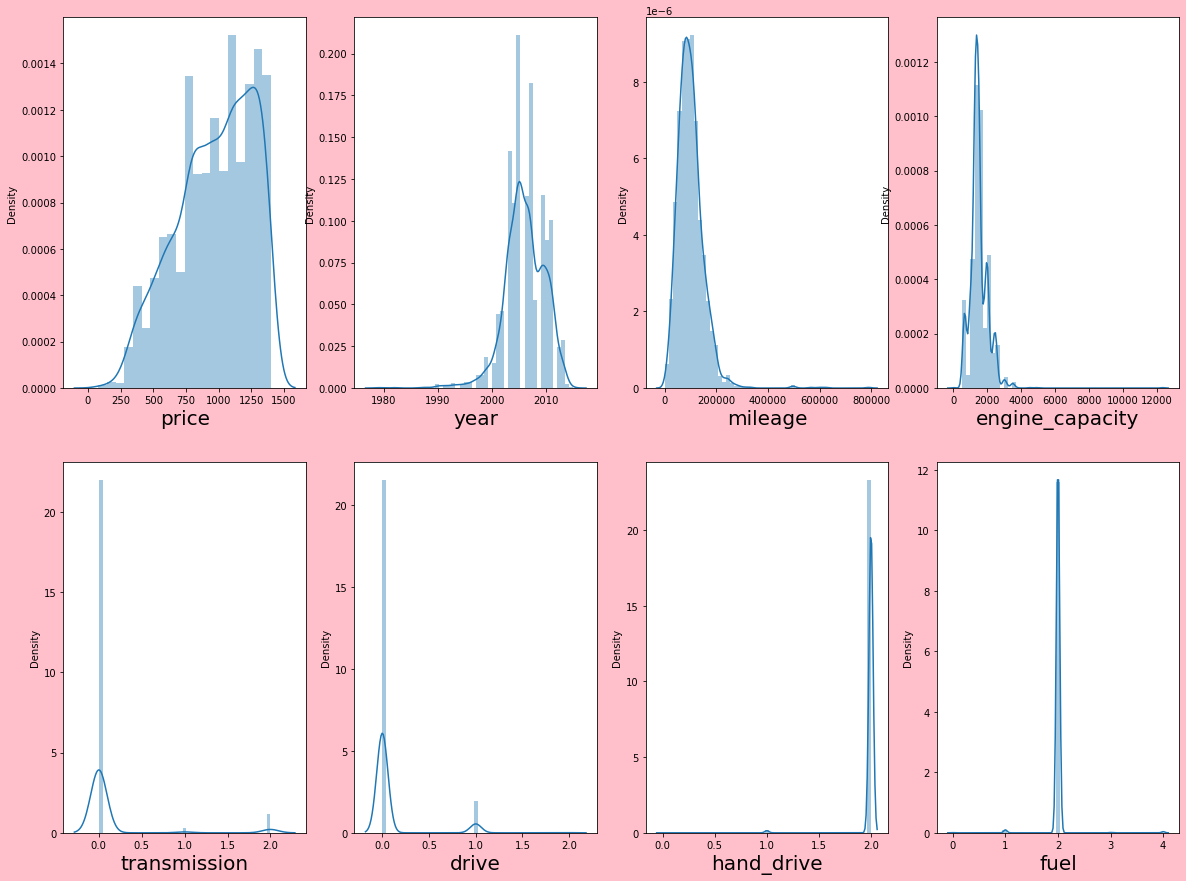

In [45]:
# Let's see how data is distributed for every column

plt.figure(figsize=(20,15), facecolor='pink')
plotnumber = 1

for column in car_df:
    if plotnumber <=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(car_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

Considering skewness in continuous numerical values, features such as year, mileage,engine_capacity has skewness whicah has to be considered. The other features being categorical data, its skewness is not considered

In [46]:
df = car_df.copy()

In [47]:
df.head()

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,2003,80000,1240,0.0,0.0,2.0,2.0
1,110,2010,53000,1200,0.0,0.0,2.0,2.0
2,165,2005,47690,2000,0.0,0.0,2.0,2.0
3,190,2008,130661,1990,0.0,0.0,2.0,2.0
4,190,2006,66300,660,0.0,0.0,2.0,2.0


In [49]:
# checking the skewness

car_df.skew()

price              -0.465751
year               -0.861857
mileage             3.092640
engine_capacity     4.135244
transmission        3.836386
drive               3.164705
hand_drive        -12.757970
fuel                4.130028
dtype: float64

As there is skewness, we will remove skewness for numerical values.
Skewness being -0.5 to +0.5, all the columns have skewness. But we will consider skewness for only numerical values and try to remove.

In [ ]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()
scaler = pt.fit_transform(x)



In [ ]:
# checking skewness again after applying power transformer

pd.DataFrame(scaler,columns=x.columns).skew()

Range of skewness is lowered for continous numerical values

In [ ]:
# converting numpy array into dataframe

x = pd.DataFrame(scaler,columns=x.columns)

In [ ]:
x.head()

In [ ]:
# Let's see how data is distributed for every column

plt.figure(figsize=(20,15), facecolor='pink')
plotnumber = 1

for column in x:
    if plotnumber <=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [ ]:
x.shape

#  checking outliers only on int dataype




In [50]:
car_df.head()

,price,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,80,2003,80000,1240,0.0,0.0,2.0,2.0
1,110,2010,53000,1200,0.0,0.0,2.0,2.0
2,165,2005,47690,2000,0.0,0.0,2.0,2.0
3,190,2008,130661,1990,0.0,0.0,2.0,2.0
4,190,2006,66300,660,0.0,0.0,2.0,2.0


In [51]:
df.shape

(2299, 8)

In [52]:
car_df.shape

(2299, 8)

In [ ]:
# Let's see how data is distributed for every column

plt.figure(figsize=(20,15), facecolor='pink')
plotnumber = 1

for column in car_df[['year', 'mileage','engine_capacity']]:
    if plotnumber <=3:
        ax = plt.subplot(1,3,plotnumber)
        sns.distplot(car_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

<AxesSubplot:>

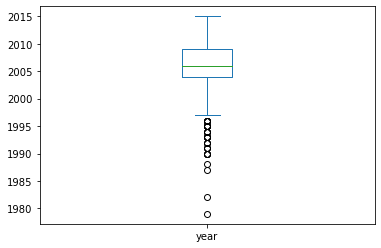

In [53]:
car_df["year"].plot.box()

<AxesSubplot:>

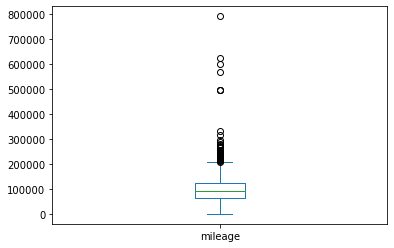

In [54]:
car_df["mileage"].plot.box()

<AxesSubplot:>

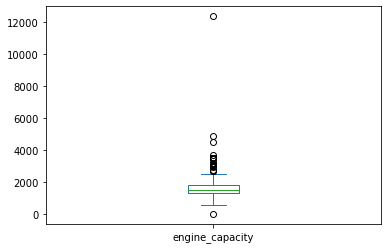

In [55]:
car_df["engine_capacity"].plot.box()

<AxesSubplot:>

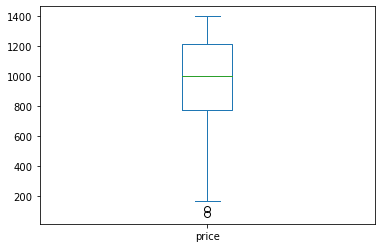

In [56]:
car_df["price"].plot.box()

Price is target variable, hence its outliers may not be considered

In [57]:
# Removal of outlier

from scipy.stats import zscore

z = zscore(car_df[['year', 'mileage','engine_capacity']])
abs_z = np.abs(z)

filtering_entry = (abs_z < 3).all(axis=1)
car_df = car_df[filtering_entry]
#x.describe()

All outliers are treated as the rule thumb for zscore is followed i.e., zscore == (-3,3)

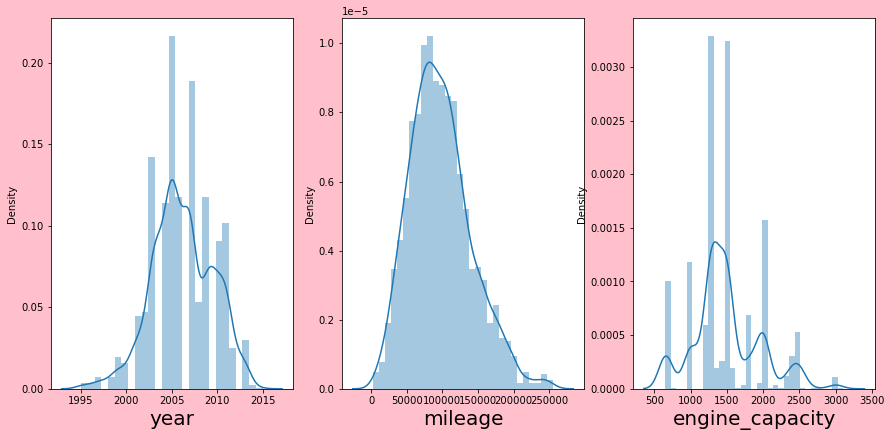

In [58]:
# Let's see how data is distributed for every column

plt.figure(figsize=(20,15), facecolor='pink')
plotnumber = 1

for column in car_df[['year', 'mileage','engine_capacity']]:
    if plotnumber <=8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(car_df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [59]:
car_df.shape

(2244, 8)

In [64]:
data_loss = ((2299 - 2244)/2299) * 100
data_loss

2.3923444976076556

As acceptable data loss is 10% and here it is 2%, less than 10%.

In [79]:
car_df['fuel'].unique()

array([2., 3., 1., 4., 0.])

In [65]:
# variable x contains all independent features and y contains target variable

x = car_df.drop('price',axis=1)
y = car_df['price']

In [66]:
x

,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,2003,80000,1240,0.0,0.0,2.0,2.0
1,2010,53000,1200,0.0,0.0,2.0,2.0
2,2005,47690,2000,0.0,0.0,2.0,2.0
3,2008,130661,1990,0.0,0.0,2.0,2.0
4,2006,66300,660,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...
2313,2009,121000,996,0.0,0.0,2.0,2.0
2314,2003,101000,3000,0.0,0.0,2.0,2.0
2315,2005,101000,660,1.0,0.0,2.0,2.0
2316,2000,170000,660,0.0,1.0,2.0,2.0


In [67]:
y

0         80
1        110
2        165
3        190
4        190
        ... 
2313    1400
2314    1400
2315    1400
2316    1400
2317    1400
Name: price, Length: 2244, dtype: int64

In [81]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

scaler=StandardScaler()
x_scaled = scaler.fit_transform(x)

In [82]:
x_scaled

array([[-0.93845052, -0.40835951, -0.53885323, ..., -0.28829474,
         0.08203338,  0.02430043],
       [ 1.14819906, -1.03183374, -0.62588656, ..., -0.28829474,
         0.08203338,  0.02430043],
       [-0.34147285, -1.15445033,  1.11477998, ..., -0.28829474,
         0.08203338,  0.02430043],
       ...,
       [-0.34147285,  0.07656488, -1.80083647, ..., -0.28829474,
         0.08203338,  0.02430043],
       [-1.83510922,  1.6698879 , -1.80083647, ...,  3.34616256,
         0.08203338,  0.02430043],
       [-0.34147285, -0.58570329,  3.29061316, ..., -0.28829474,
         0.08203338,  0.02430043]])

In [83]:
x

,year,mileage,engine_capacity,transmission,drive,hand_drive,fuel
0,2.757245,80000,1240,0.0,0.0,2.0,2.0
1,2.757878,53000,1200,0.0,0.0,2.0,2.0
2,2.757426,47690,2000,0.0,0.0,2.0,2.0
3,2.757697,130661,1990,0.0,0.0,2.0,2.0
4,2.757517,66300,660,0.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...
2313,2.757788,121000,996,0.0,0.0,2.0,2.0
2314,2.757245,101000,3000,0.0,0.0,2.0,2.0
2315,2.757426,101000,660,1.0,0.0,2.0,2.0
2316,2.756973,170000,660,0.0,1.0,2.0,2.0


In [84]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


lr = LinearRegression()

In [85]:
for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    print(f"At random state {i}, the training accuracy is: ,{r2_score(y_train,pred_train)}")   
    
    print(f"At random state {i}, the testing accuracy is , {r2_score(y_test,pred_test)}")  
    print("\n")

At random state 0, the training accuracy is: ,0.0736106748553047
At random state 0, the testing accuracy is , 0.06189194243847118


At random state 1, the training accuracy is: ,0.07660302258873675
At random state 1, the testing accuracy is , 0.048212961392924414


At random state 2, the training accuracy is: ,0.07315942617152549
At random state 2, the testing accuracy is , 0.061842752160976344


At random state 3, the training accuracy is: ,0.0641966647048372
At random state 3, the testing accuracy is , 0.09644409660273012


At random state 4, the training accuracy is: ,0.06594788329002677
At random state 4, the testing accuracy is , 0.09346206217605346


At random state 5, the training accuracy is: ,0.05788299215467896
At random state 5, the testing accuracy is , 0.12439508806662103


At random state 6, the training accuracy is: ,0.0704371320138576
At random state 6, the testing accuracy is , 0.0718682666218804


At random state 7, the training accuracy is: ,0.07562657180349774
At ra

At random state 75, the training accuracy is: ,0.071341238046994
At random state 75, the testing accuracy is , 0.07276399596494487


At random state 76, the training accuracy is: ,0.07364317195529635
At random state 76, the testing accuracy is , 0.060759940802934675


At random state 77, the training accuracy is: ,0.06723636981402992
At random state 77, the testing accuracy is , 0.07688098471626215


At random state 78, the training accuracy is: ,0.07304399540174411
At random state 78, the testing accuracy is , 0.06126614239125716


At random state 79, the training accuracy is: ,0.07293973239931195
At random state 79, the testing accuracy is , 0.06520052397116993


At random state 80, the training accuracy is: ,0.07170671868268019
At random state 80, the testing accuracy is , 0.07085472688386252


At random state 81, the training accuracy is: ,0.07626310399769021
At random state 81, the testing accuracy is , 0.044104373989220624


At random state 82, the training accuracy is: ,0.070793

In [86]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=62)
 

In [87]:
lr.fit(x_train,y_train)

LinearRegression()

In [88]:
pred_test = lr.predict(x_test)

In [89]:
print(r2_score(y_test,pred_test))

0.07119597575452885


# cross validation score

In [97]:
train_accuracy = r2_score(y_train,pred_train)
test_accuracy = r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score

for j in range(2,10):
    cv_score = cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    print(f"At Cross fold {j} the cv score is {cv_mean} and accuracy score for training is {train_accuracy} and accuracy score for testing is {test_accuracy}")
    print("\n")

At Cross fold 2 the cv score is -11.491074837810832 and accuracy score for training is -0.05287293808957827 and accuracy score for testing is 0.07119597575452885


At Cross fold 3 the cv score is -16.209243915914225 and accuracy score for training is -0.05287293808957827 and accuracy score for testing is 0.07119597575452885


At Cross fold 4 the cv score is -23.43245040927411 and accuracy score for training is -0.05287293808957827 and accuracy score for testing is 0.07119597575452885


At Cross fold 5 the cv score is -34.89317361561312 and accuracy score for training is -0.05287293808957827 and accuracy score for testing is 0.07119597575452885


At Cross fold 6 the cv score is -46.884591812668894 and accuracy score for training is -0.05287293808957827 and accuracy score for testing is 0.07119597575452885


At Cross fold 7 the cv score is -55.229376493493355 and accuracy score for training is -0.05287293808957827 and accuracy score for testing is 0.07119597575452885


At Cross fold 8 th

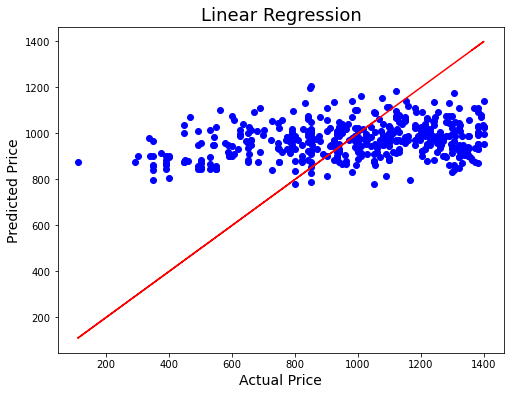

In [99]:
# plot and visualize
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='b')
plt.plot(y_test,y_test,color='r')

plt.xlabel('Actual Price',fontsize=14)
plt.ylabel('Predicted Price',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

The best fit line is not covering data poits. It shows that is it is not a good fit model

# Regularization

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [101]:
parameters = {'alpha':[.0001,.001,.01,.1,1,10],
              'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [103]:
# final model training

ls = Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls_score_training = ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)
ls_score_training*100

7.135175055381859

In [104]:
pred_ls = ls.predict(x_test)


In [105]:
lss = r2_score(y_test,pred_ls)
lss*100

7.093190754143919

In [106]:
cv_score = cross_val_score(ls,x,y,cv=5)
cv_mean = cv_score.mean()
cv_mean*100

-3453.639919196688